## Visual Secret Sharing

This program creates two images (S1.png and S2.png) when they are superimposed on each other a secret message emarges

the vairable `text` contains the secret message which should be given as input

This scheme is Information Theoretically Secure. That is no matter how powerful computer one has, they cannot recover the 
secret if the have access to only one of the secret shares. 

In [212]:
# import all the usual suspects
import numpy as np
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
from PIL import Image, ImageDraw, ImageFont

# Your message
text = "Shh! Keep It Secret"

# Load a font
font = ImageFont.load_default()

# Create a temporary image to calculate text size
dummy_img = Image.new('1', (1, 1))
draw = ImageDraw.Draw(dummy_img)

# Use textbbox to get bounding box of the text
bbox = draw.textbbox((0, 0), text, font=font)
width = bbox[2] - bbox[0]
height = bbox[3] - bbox[1]

# Create the actual image with padding
image = Image.new('1', (width + 10, height + 10), color=1)  # White background
draw = ImageDraw.Draw(image)
draw.text((5, 5), text, font=font, fill=0)  # Black text

# Save the image
image.save("text_bitmap.bmp")



# Load the bitmap image
image = Image.open("text_bitmap.bmp")

# Convert to NumPy array
bitmap_array = np.array(image)

# Print the array (optional)
# print(bitmap_array)
bitmap_array = (np.array(image) == 0).astype(np.uint8)  # 1 for black text, 0 for white


#more test changes

In [214]:
# height width

h,w = bitmap_array.shape[0],bitmap_array.shape[1]

s1 = np.zeros([h,w],dtype="int64")

for i in range(h):
    for j in range(w):
        s1[i,j] = np.random.choice([0, 1])


In [215]:


secret = bitmap_array

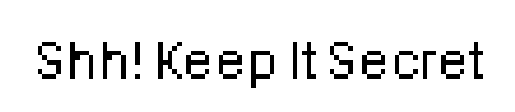

In [216]:
plt.imshow(np.ones([h,w])-secret, cmap='gray', vmin=0, vmax=1)
plt.axis('off')  # Optional: remove axis ticks
plt.show()

In [217]:
#encode the secret
s2 = (s1 + secret) % 2 
# s2

In [218]:
# create visual secret share
def create_vss(s):
    pat0 = np.zeros([2,2])
    pat0[0,1] = 1
    pat0[1,0] = 1
    pat1 = np.zeros([2,2])
    pat1[0,0] = 1
    pat1[1,1] = 1

    A = np.zeros([s.shape[0]*2,s.shape[1]*2],dtype='int64')
    for i in range (s.shape[0]):
        for j in range (s.shape[1]):
            if s[i,j]==0:
                #copy 0 pattern
                A[i*2:i*2+2,j*2:j*2+2] = pat0
            else:
                A[i*2:i*2+2,j*2:j*2+2] = pat1
    return A

In [219]:
# Share 1
vss1 = create_vss(create_vss(s1))
# vss1

In [220]:
# Share 2
vss2 =  create_vss(create_vss(s2))
# vss2

In [221]:
# compute image size 
n = len(text)
dpi = 300
unit_px = 2000
sh_px = 2*unit_px
sw_px = n*unit_px
sh_in = sh_px / dpi
sw_in = sw_px / dpi

print (sh_in,sw_in)

13.333333333333334 126.66666666666667


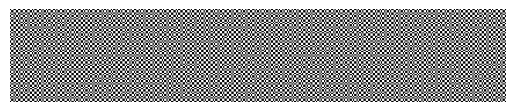

In [222]:
vss = vss1
rgba = np.zeros((vss.shape[0], vss.shape[1], 4))
rgba[vss == 0] = [0, 0, 0, 1]

plt.imshow(rgba)

plt.axis('off')

#plt.show()
# Create a figure with specific size
fig = plt.figure(figsize=(sh_in, sw_in), dpi=dpi)
plt.imshow(rgba)
# plt.axis('off')

# Save without extra padding or borders
plt.savefig('S1.png', dpi=100, bbox_inches='tight', pad_inches=0, transparent=True)
plt.close(fig)

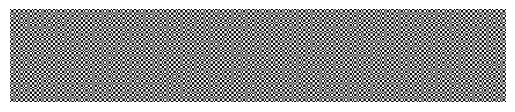

In [ ]:
vss = vss2
rgba = np.zeros((vss.shape[0], vss.shape[1], 4))
rgba[vss == 0] = [0, 0, 0, 1]

plt.imshow(rgba)

plt.axis('off')

#plt.show()
# Create a figure with specific size
fig = plt.figure(figsize=(sh_in, sw_in), dpi=dpi)
plt.imshow(rgba)
# plt.axis('off')
#test

# Save without extra padding or borders
plt.savefig('S2.png', dpi=100, bbox_inches='tight', pad_inches=0, transparent=True)
plt.close(fig)